In [9]:
import pandas as pd
import numpy as np
import statsmodels
import matplotlib.pyplot as plt


In [11]:
plt.rcParams['figure.dpi'] = 120 # Adjusting figure size

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

/home/priya/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


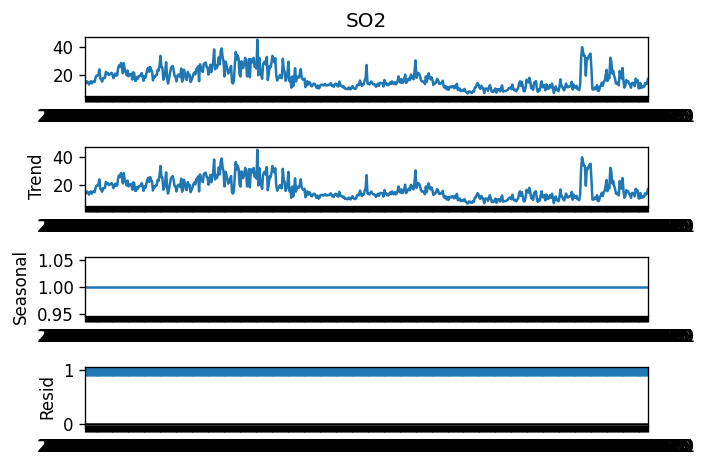

In [12]:
series = pd.read_csv('North_mean_df.csv', header=0, index_col=0)
result = seasonal_decompose(series['SO2'], model='multiplicative', freq=1)
result.plot()
plt.show()

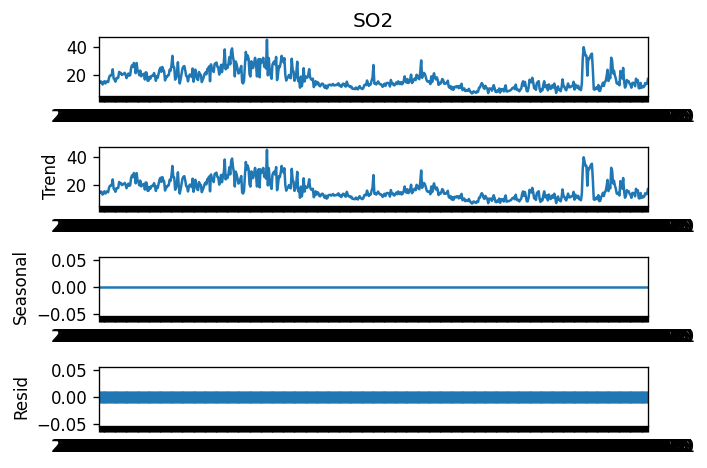

In [13]:
series = pd.read_csv('North_mean_df.csv', header=0, index_col=0)
result = seasonal_decompose(series['SO2'], model='additive', period=1)
result.plot()
plt.show()

<AxesSubplot:xlabel='Date'>

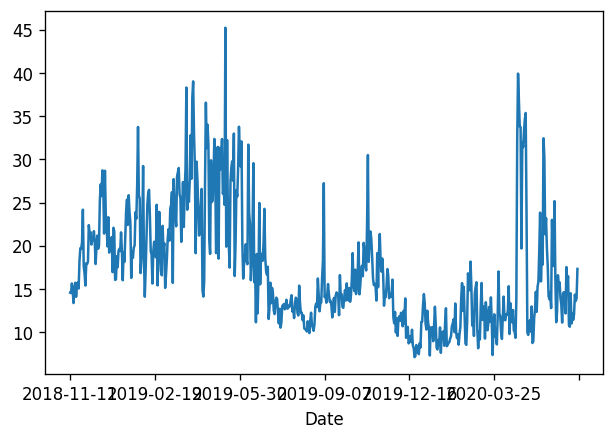

In [14]:
series['SO2'].plot()

<AxesSubplot:xlabel='Date'>

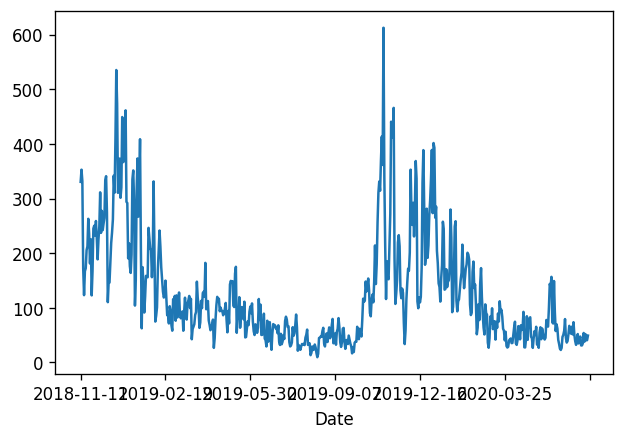

In [15]:
series['PM2.5'].plot()

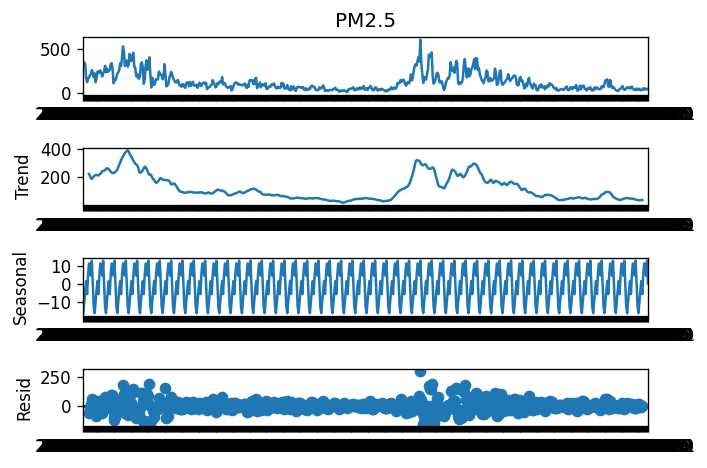

In [20]:
result = seasonal_decompose(series['PM2.5'], model='additive', period=12)
result.plot()
plt.show()

<AxesSubplot:xlabel='Date'>

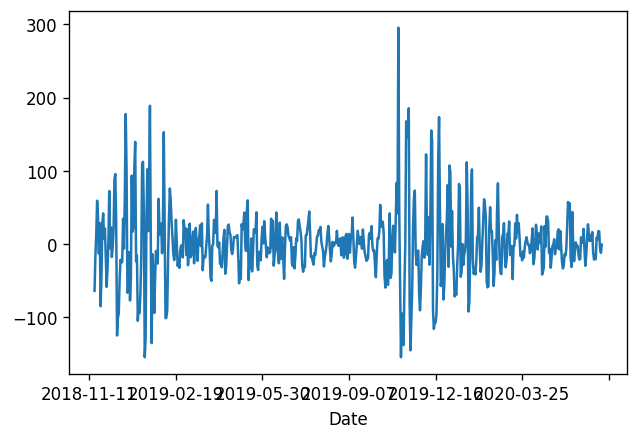

In [36]:
(result.observed - result.seasonal-result.trend).plot()

In [37]:
decomposition = seasonal_decompose(series['PM2.5'],freq=12,extrapolate_trend = 1) 

/home/priya/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


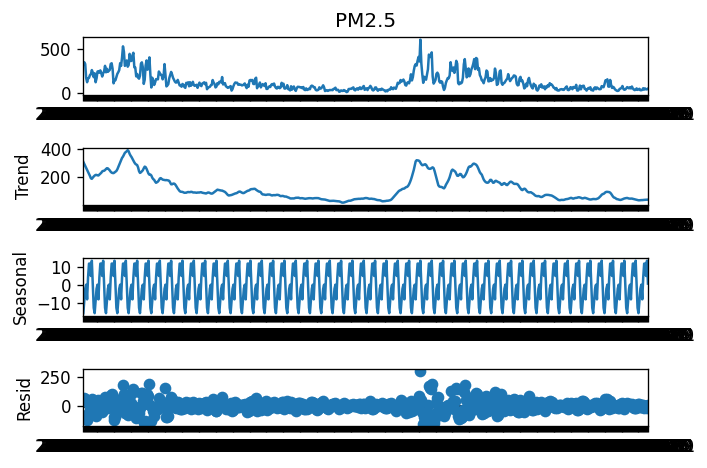

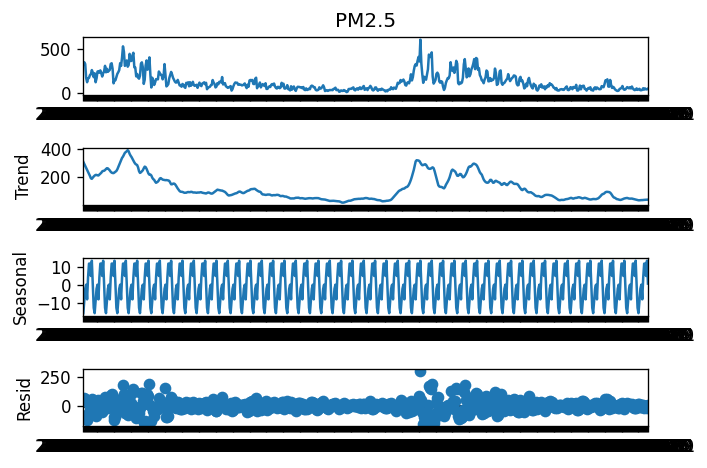

In [38]:
decomposition.plot()

In [39]:
decomposition.observed

Date
2018-11-11    330.5575
2018-11-12    352.8550
2018-11-13    331.9575
2018-11-14    172.1800
2018-11-15    123.1575
                ...   
2020-06-27     38.2125
2020-06-28     51.9950
2020-06-29     40.5650
2020-06-30     40.7975
2020-07-01     49.1875
Name: PM2.5, Length: 599, dtype: float64

In [40]:
decomposition.seasonal

Date
2018-11-11   -15.364061
2018-11-12    -8.424380
2018-11-13    -2.092126
2018-11-14     0.116612
2018-11-15    -7.855476
                ...    
2020-06-27    11.588783
2020-06-28    11.630174
2020-06-29     4.871939
2020-06-30    13.173599
2020-07-01     0.719479
Name: seasonal, Length: 599, dtype: float64

In [41]:
decomposition.trend

Date
2018-11-11    308.388646
2018-11-12    294.426458
2018-11-13    280.464271
2018-11-14    266.502083
2018-11-15    252.539896
                 ...    
2020-06-27     42.858125
2020-06-28     43.335625
2020-06-29     43.813125
2020-06-30     44.290625
2020-07-01     44.768125
Name: trend, Length: 599, dtype: float64

In [42]:
decomposition.resid

Date
2018-11-11     37.532915
2018-11-12     66.852921
2018-11-13     53.585355
2018-11-14    -94.438695
2018-11-15   -121.526920
                 ...    
2020-06-27    -16.234408
2020-06-28     -2.970799
2020-06-29     -8.120064
2020-06-30    -16.666724
2020-07-01      3.699896
Name: resid, Length: 599, dtype: float64

<AxesSubplot:xlabel='Date'>

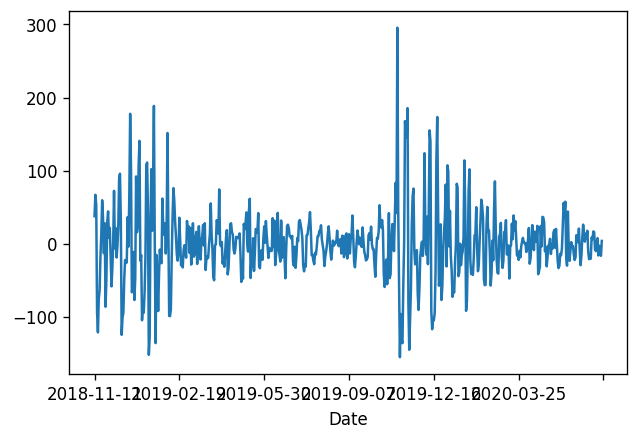

In [43]:
(decomposition.observed- decomposition.trend-decomposition.seasonal).plot()

In [47]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [48]:
detrend = decomposition.observed- decomposition.trend-decomposition.seasonal

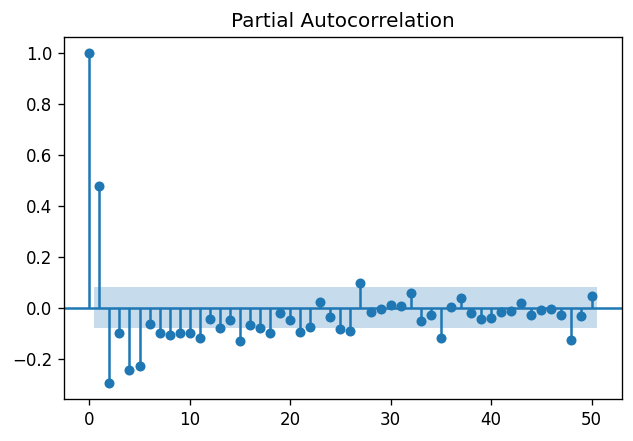

In [50]:
plot_pacf(detrend, lags=50)
plt.show()

In [51]:
detrend = decomposition.observed- decomposition.seasonal

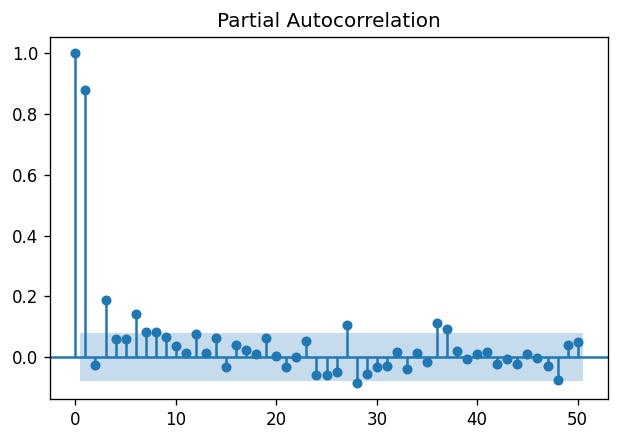

In [52]:
plot_pacf(detrend, lags=50)
plt.show()

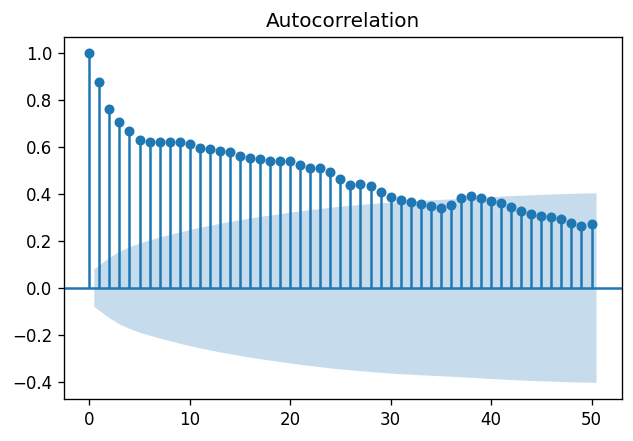

In [53]:
plot_acf(detrend, lags=50)
plt.show()

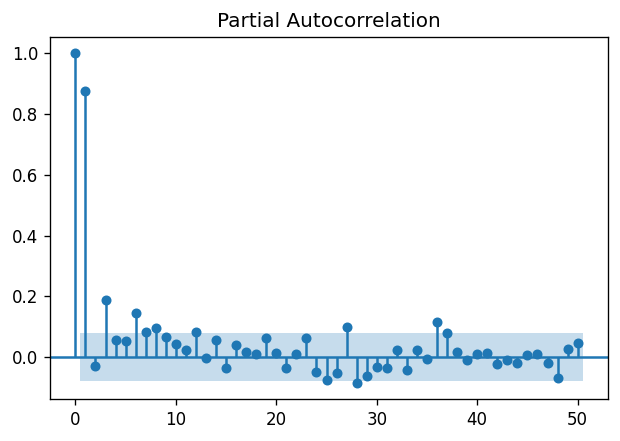

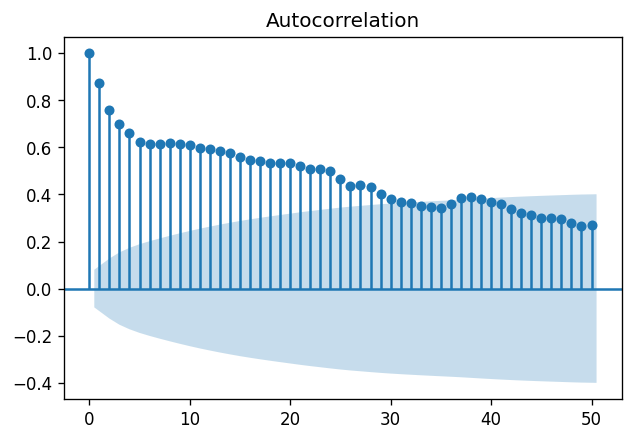

In [54]:
plot_pacf(decomposition.observed, lags=50)
plot_acf(decomposition.observed, lags=50)
plt.show()

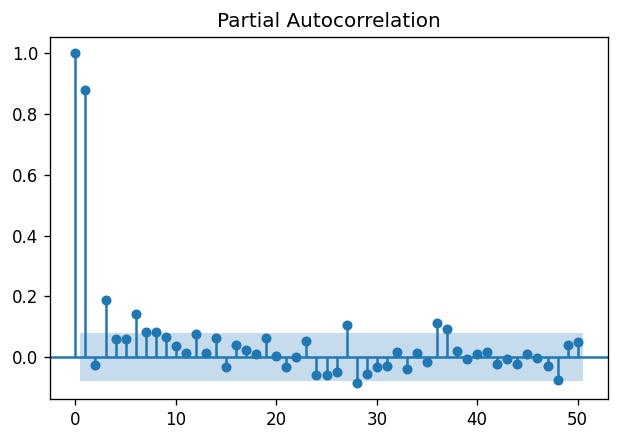

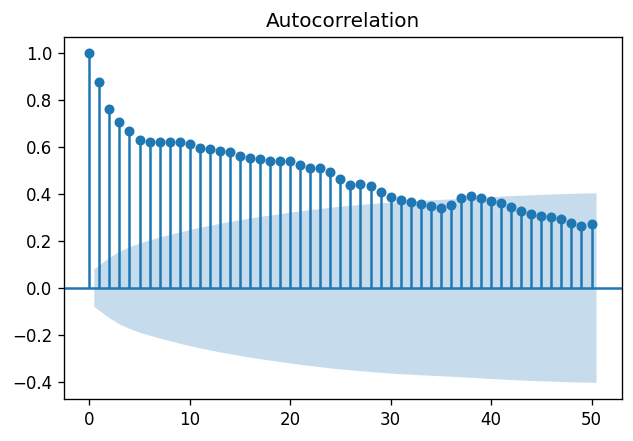

In [55]:
plot_pacf(decomposition.observed-decomposition.seasonal, lags=50)
plot_acf(decomposition.observed-decomposition.seasonal, lags=50)
plt.show()

In [56]:
def test_stationarity(timeseries,lag):
    
    #Determing rolling statistics
    #pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()   #moving average
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = lag)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


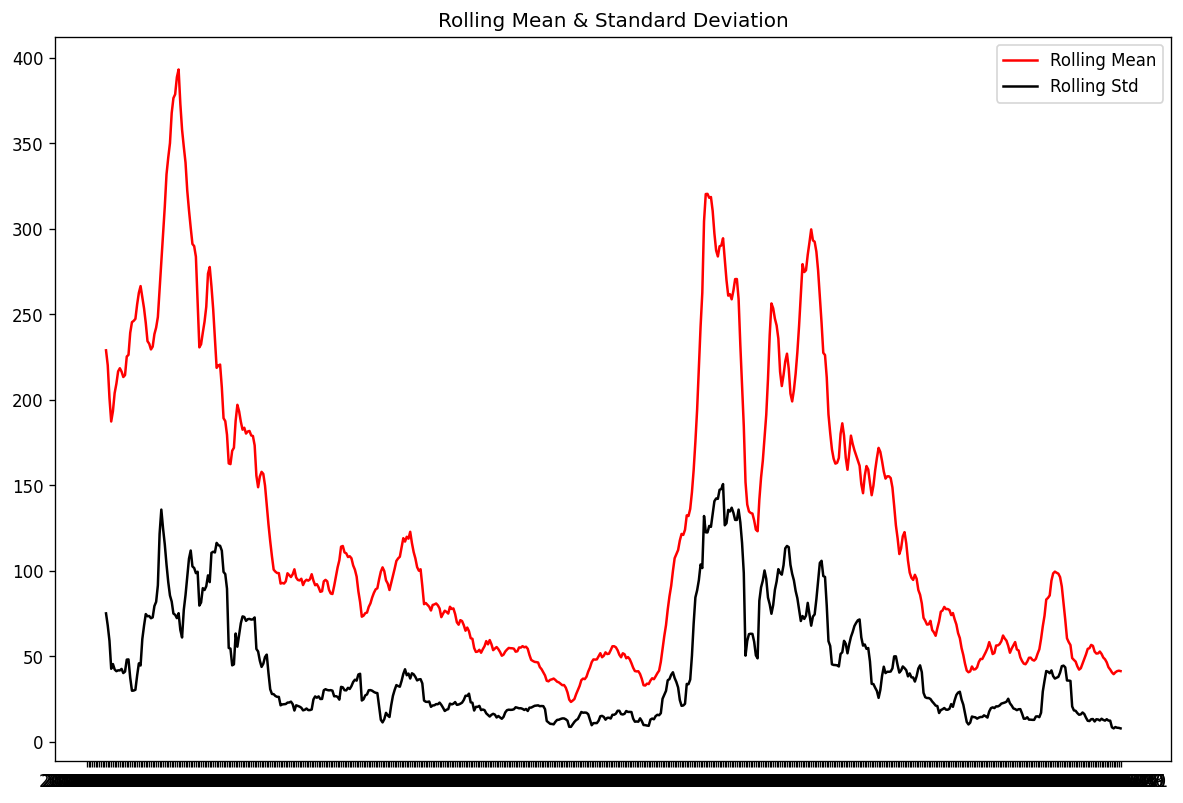

Results of Dickey-Fuller Test:
Test Statistic                  -2.788874
p-value                          0.059881
#Lags Used                       8.000000
Number of Observations Used    590.000000
Critical Value (1%)             -3.441482
Critical Value (5%)             -2.866451
Critical Value (10%)            -2.569386
dtype: float64


In [60]:
test_stationarity(series['PM2.5'],'AIC')

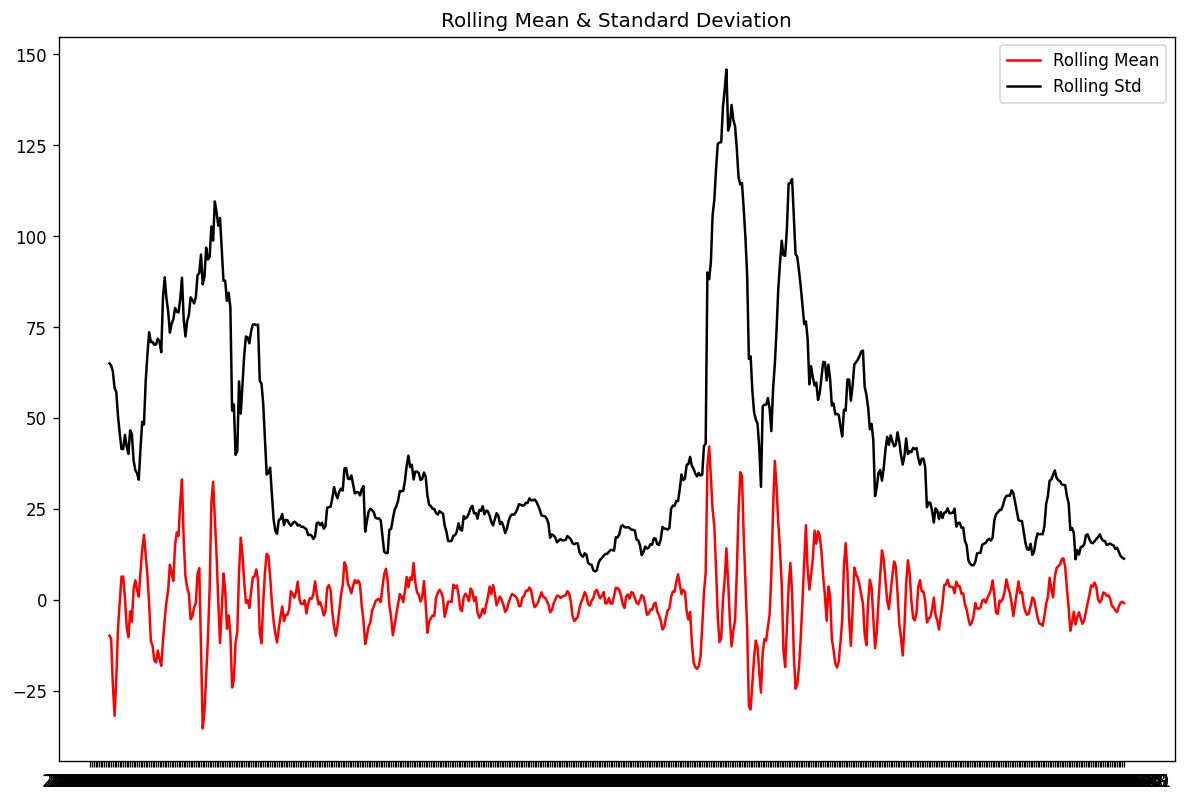

Results of Dickey-Fuller Test:
Test Statistic                -1.080281e+01
p-value                        1.997777e-19
#Lags Used                     1.700000e+01
Number of Observations Used    5.810000e+02
Critical Value (1%)           -3.441655e+00
Critical Value (5%)           -2.866527e+00
Critical Value (10%)          -2.569426e+00
dtype: float64


In [62]:
test_stationarity(detrend-decomposition.trend,'AIC')

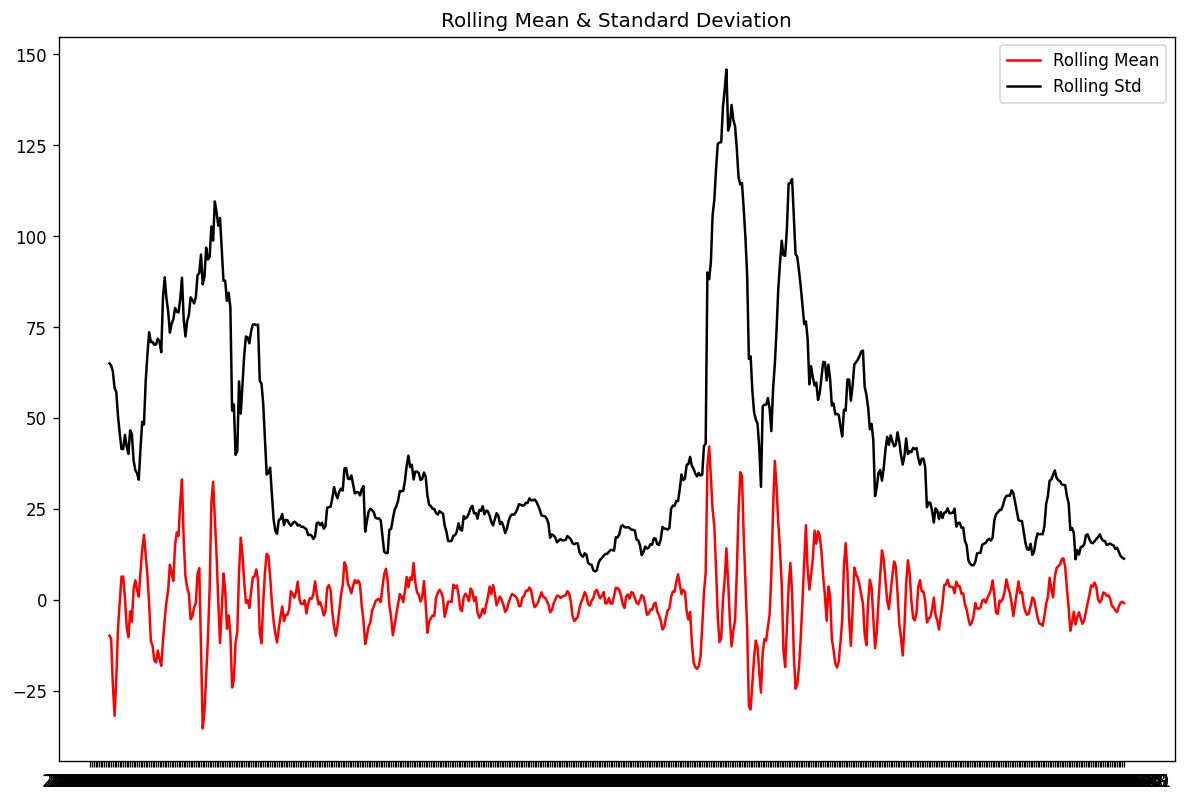

Results of Dickey-Fuller Test:
Test Statistic                -1.725073e+01
p-value                        6.025806e-30
#Lags Used                     4.000000e+00
Number of Observations Used    5.940000e+02
Critical Value (1%)           -3.441407e+00
Critical Value (5%)           -2.866418e+00
Critical Value (10%)          -2.569368e+00
dtype: float64


In [63]:
test_stationarity(detrend-decomposition.trend,'BIC')

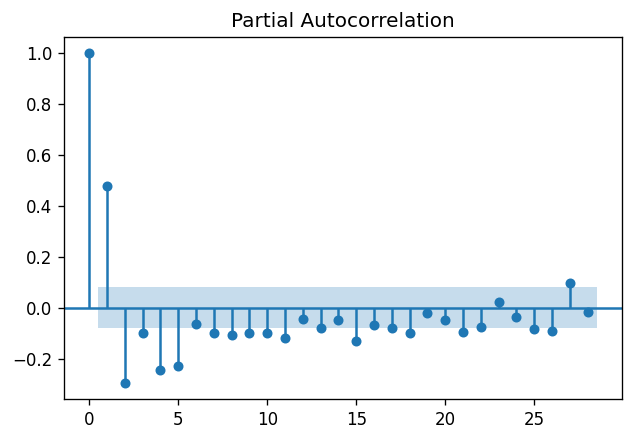

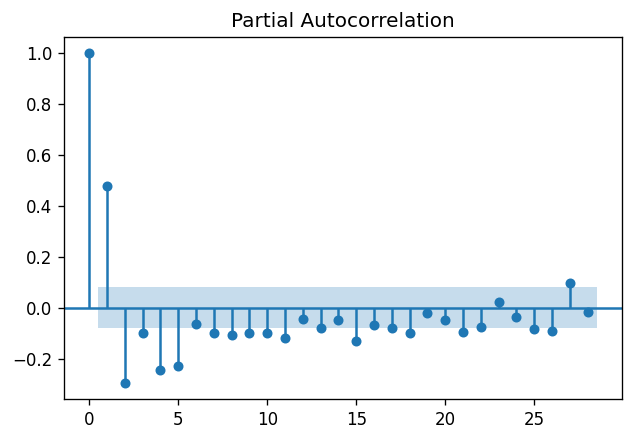

In [66]:
series

,PM2.5,PM10,NO,NO2,NOx,SO2
Date,,,,,,
2018-11-11,330.5575,476.2675,74.2575,80.0950,102.1150,14.5675
2018-11-12,352.8550,510.6200,73.2750,82.8600,100.2000,14.5125
2018-11-13,331.9575,481.1750,86.9150,80.1550,113.4875,15.6300
2018-11-14,172.1800,252.8225,43.0700,63.5300,68.8950,14.7675
2018-11-15,123.1575,186.9800,30.7800,57.8825,55.5575,13.3600
...,...,...,...,...,...,...
2020-06-27,38.2125,161.2325,9.1225,24.8975,20.6775,12.0300
2020-06-28,51.9950,294.9400,12.9150,25.7200,24.2200,14.3375
2020-06-29,40.5650,181.5350,11.5850,25.6200,23.0350,13.6000


In [67]:
final = decomposition.observed- decomposition.seasonal-decomposition.trend

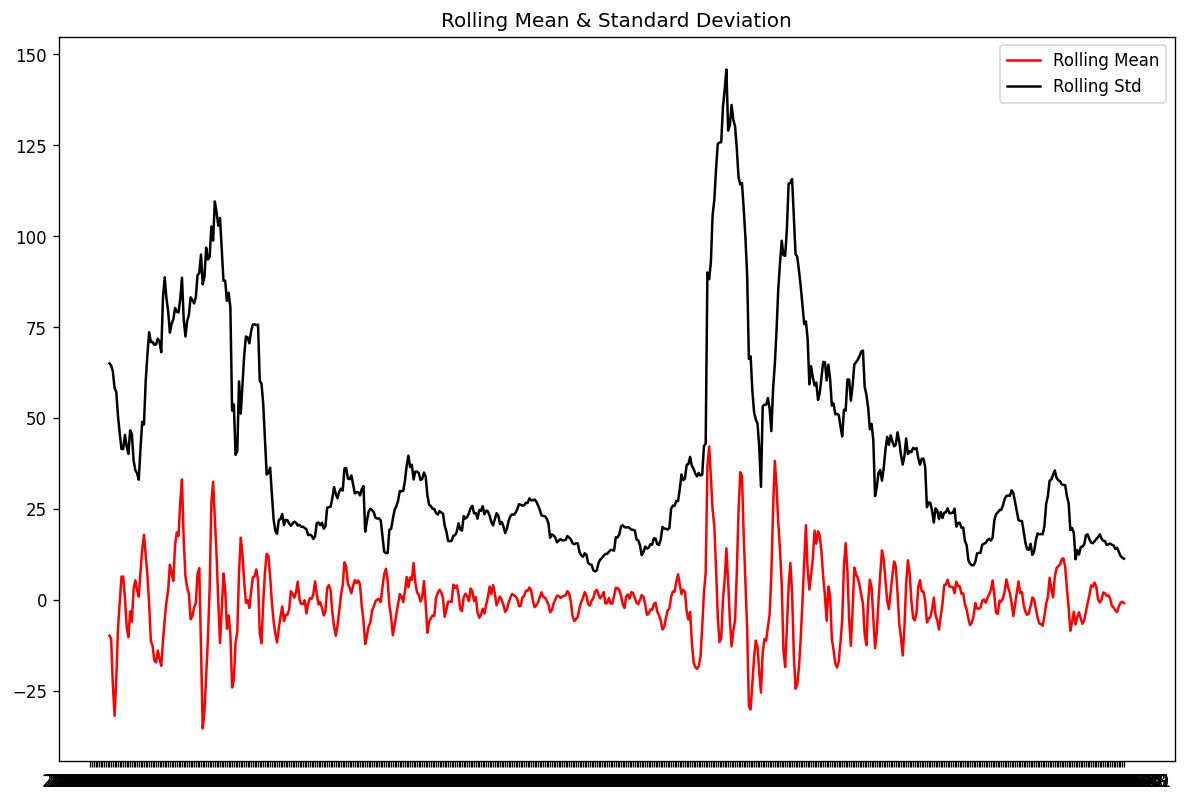

Results of Dickey-Fuller Test:
Test Statistic                -1.725073e+01
p-value                        6.025806e-30
#Lags Used                     4.000000e+00
Number of Observations Used    5.940000e+02
Critical Value (1%)           -3.441407e+00
Critical Value (5%)           -2.866418e+00
Critical Value (10%)          -2.569368e+00
dtype: float64


In [69]:
test_stationarity(final,'BIC')

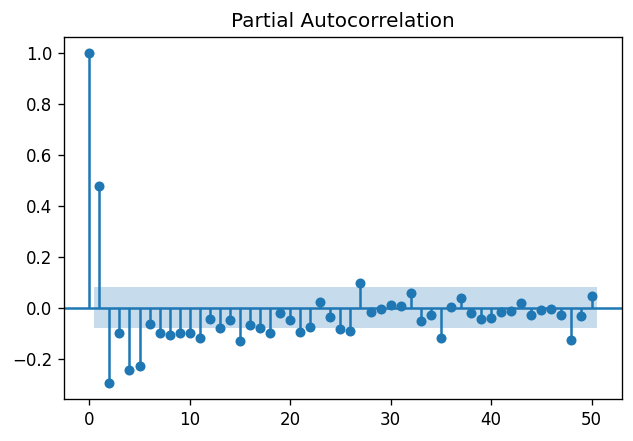

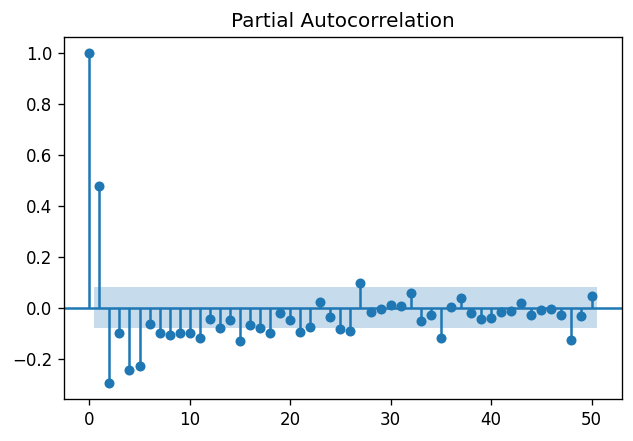

In [70]:
plot_pacf(final, lags=50)

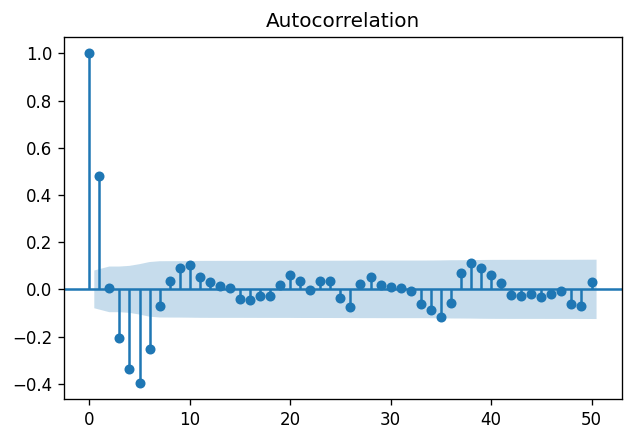

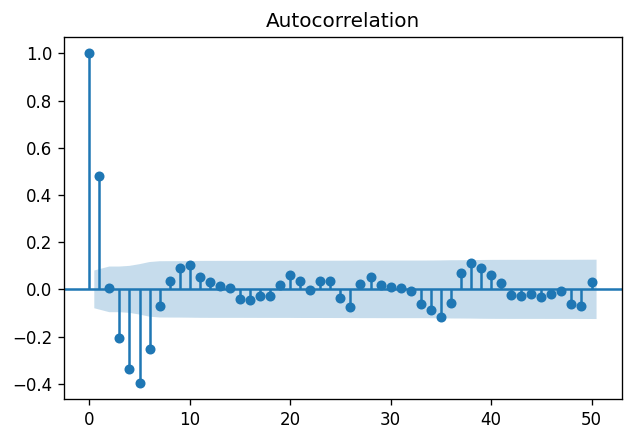

In [71]:
plot_acf(final, lags=50)